## Visualization of image discretization 

### Data Pipeline

In [1]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
from omegaconf import OmegaConf

from imutils import imsshow
from data.convertation import linrgbf_to_srgbf

from services.tester import MainTester
from deconv.classic.wiener.wiener import wiener_gray
from metrics import psnr, ssim
from constants import IMAGE_SIZE

plt.gray()

<Figure size 640x480 with 0 Axes>

In [2]:
img_path = "../datasets/gt/precomp/icons_jpg/1/adopt.png"
psf_path = '../datasets/kernels/motion-blur/processed/Sun/sun-3.npy'
config = OmegaConf.load('../configs/config_viz.yml')
cm = config.models

wiener_noised = lambda image, psf: wiener_gray(image, psf, **cm.wiener_nonblind_noise.noise_params)
wiener = lambda image, psf: wiener_gray(image, psf, **cm.wiener_nonblind_noise.no_noise_params)


images, psf = MainTester.get_data(img_path, psf_path, image_size=IMAGE_SIZE, noise_mu=config.dataset.blur.mu, noise_std=config.dataset.blur.sigma)

# 1) Main Tester Data Pipilene

LINRGB_FLOAT
SSIM: 0.9999972478704453; PSNR: 78.2703541922442
LINRGB_16BIT
SSIM: 0.9999966518239976; PSNR: 77.31919136899864
LINRGB_8BIT
SSIM: 0.932240172296524; PSNR: 33.578341129782565
SRGB_8BIT
SSIM: 0.8741534210813046; PSNR: 28.897379143287885


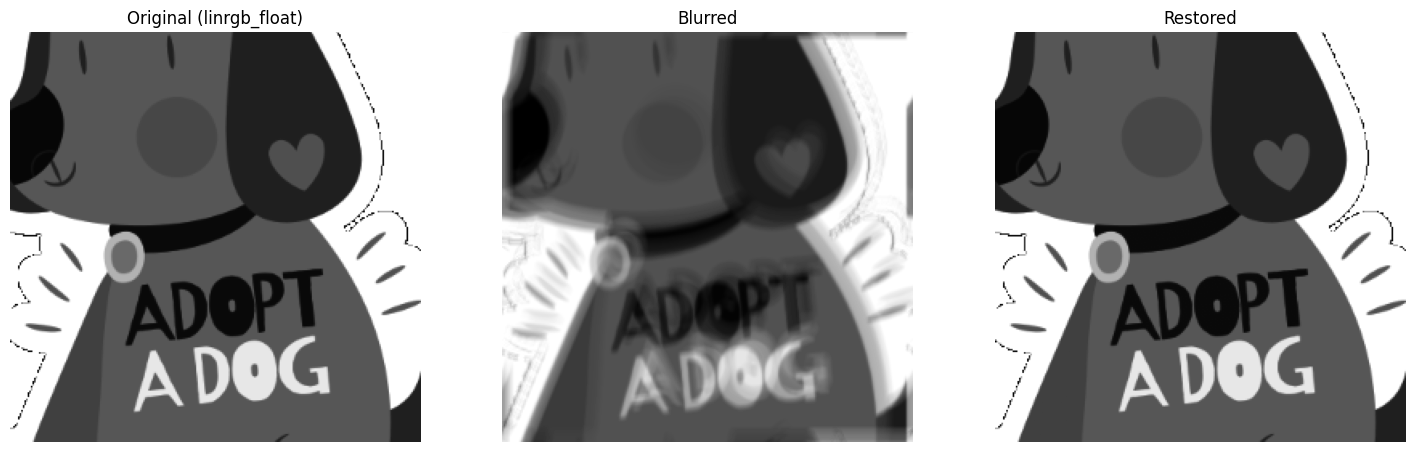

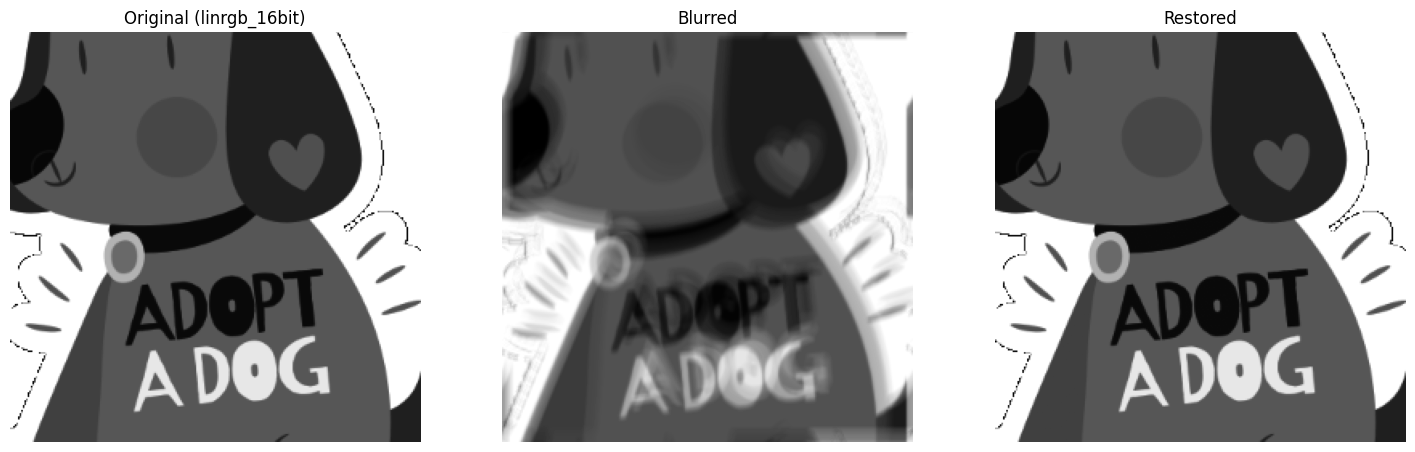

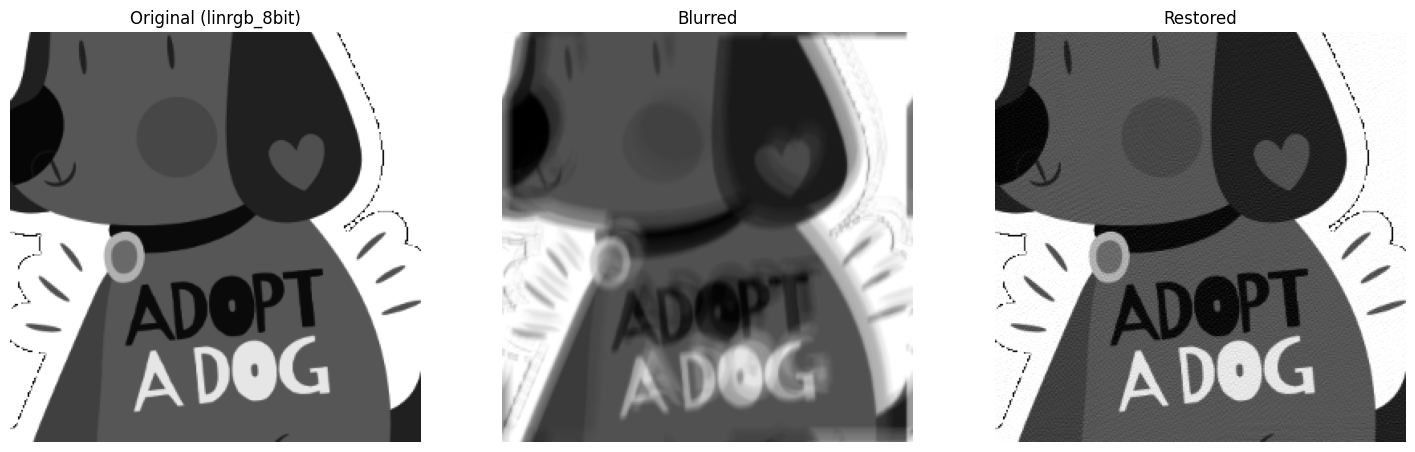

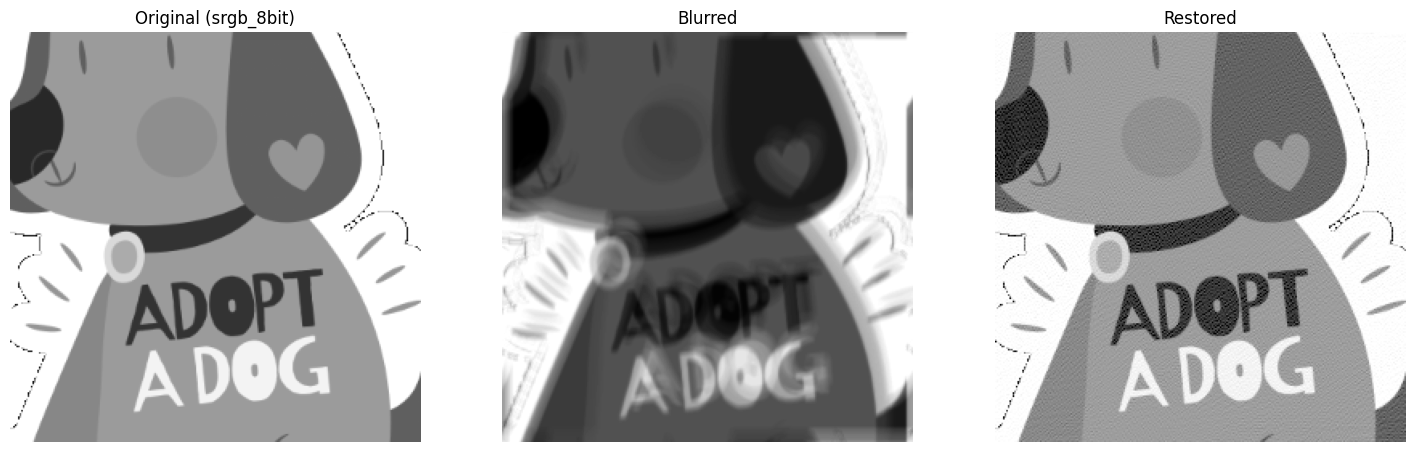

In [3]:
for discr_type in images.keys():
    image = images[discr_type]['image']
    blurred_image = images[discr_type]['blurred_no_noise']['1d']
    restored = wiener(blurred_image, psf)

    if discr_type.startswith('srgb'):
        restored = linrgbf_to_srgbf(restored)

    imsshow([image, blurred_image, restored], figsize=(18, 7), titles=[f'Original ({discr_type})', 'Blurred', 'Restored'])
    print(discr_type.upper())
    print(f'SSIM: {ssim(image, restored)}; PSNR: {psnr(image, restored)}')

With noise

LINRGB_FLOAT
SSIM: 0.9179439493551255; PSNR: 27.09809056268774
LINRGB_16BIT
SSIM: 0.9179425162129402; PSNR: 27.09796879548619
LINRGB_8BIT
SSIM: 0.9166818875102997; PSNR: 27.0523380899523
SRGB_8BIT
SSIM: 0.9007089569647312; PSNR: 27.1057782486742


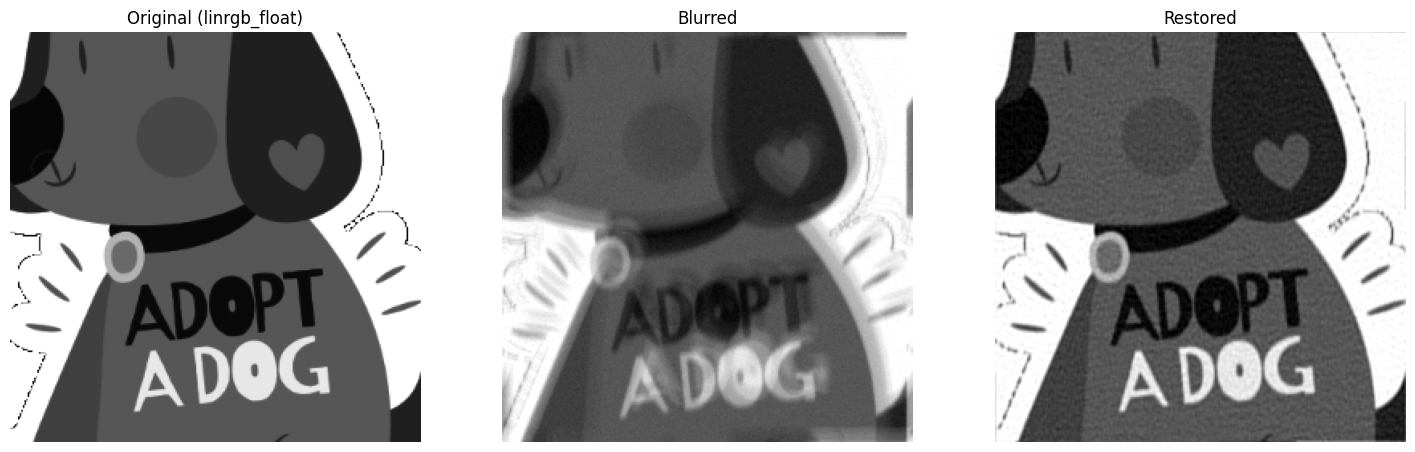

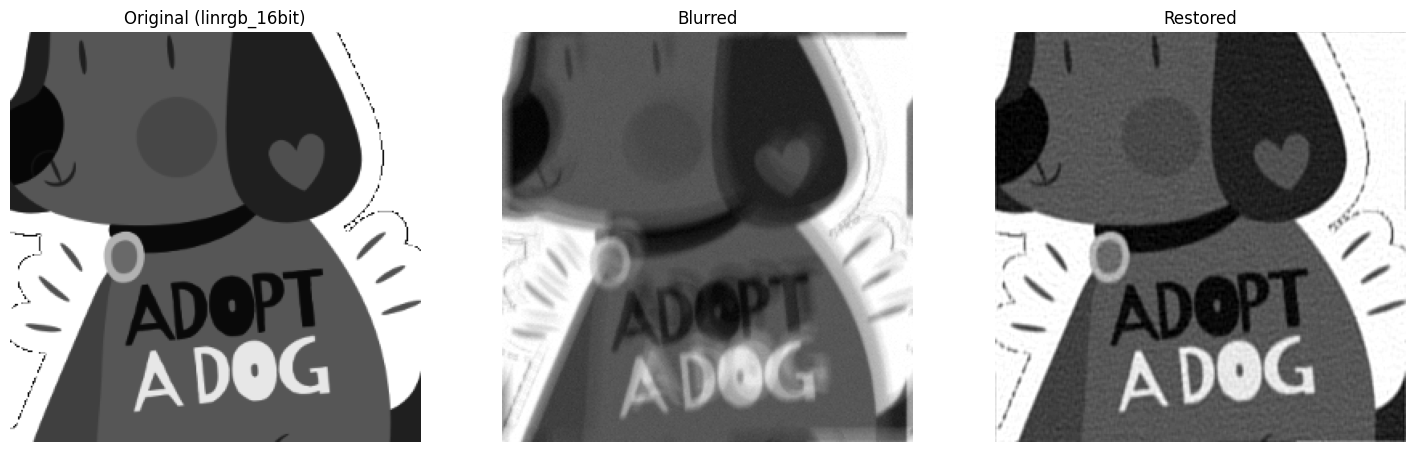

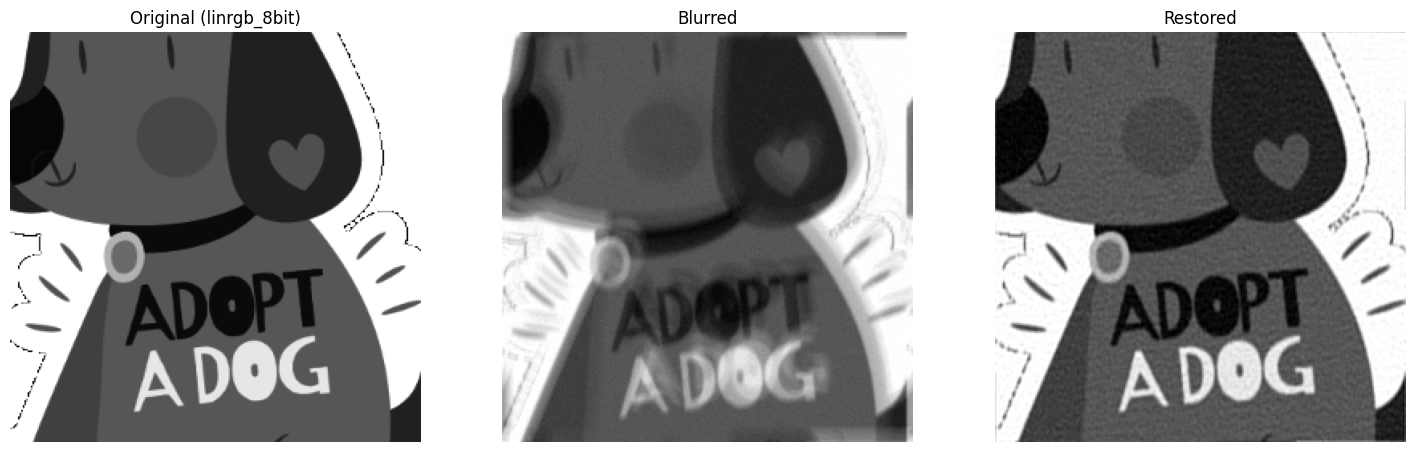

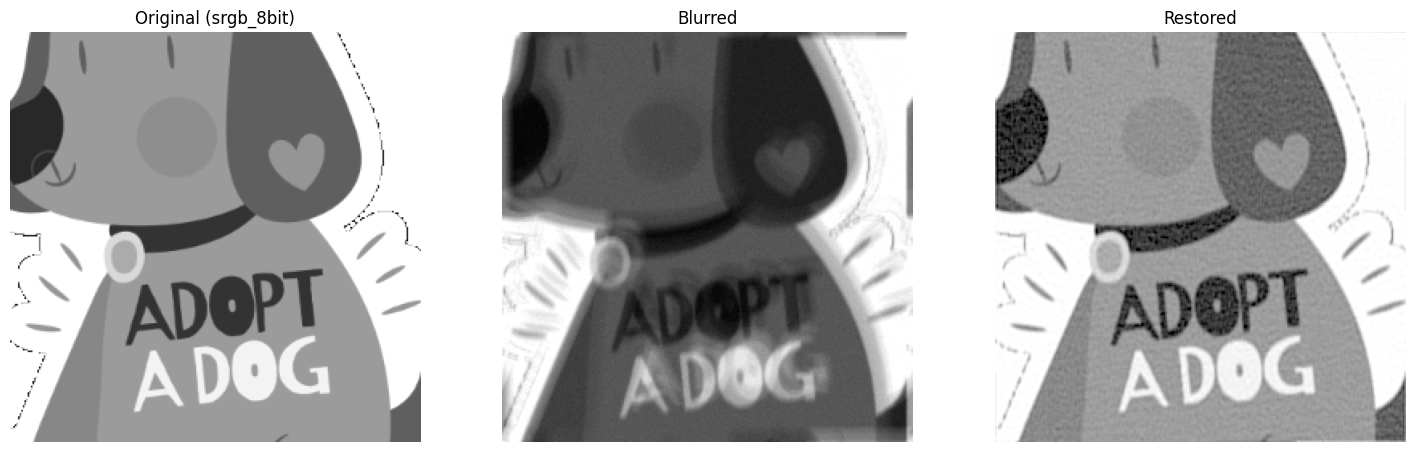

In [5]:
for discr_type in images.keys():
    image = images[discr_type]['image']
    blurred_image = images[discr_type]['blurred_noise']['1d']
    restored = wiener_noised(blurred_image, psf)

    if discr_type.startswith('srgb'):
        restored = linrgbf_to_srgbf(restored)

    imsshow([image, blurred_image, restored], figsize=(18, 7), titles=[f'Original ({discr_type})', 'Blurred', 'Restored'])
    print(discr_type.upper())
    print(f'SSIM: {ssim(image, restored)}; PSNR: {psnr(image, restored)}')

# 2) Model-vs-real Tester